<a href="https://colab.research.google.com/github/zalllrizalll/DataMining/blob/main/Naive_Bayes/SocialNetworkAds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Read Dataset**

In [2]:
dataset = pd.read_csv('Social Network Ads.csv')

In [3]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

**Splitting the Dataset into Training Set and Test set**

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

**Feature Scalling**

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Training the Naive Bayes model on the Training Set**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

**Predicting the Test Set Results**

In [7]:
y_pred = classifier.predict(x_test)

**Making the Confusion Matrix**

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


**Displays more detailed accuracy**

In [10]:
from sklearn.metrics import classification_report # Import library sklearn.metrics untuk memanggil function classification_report
akurasi = classification_report(y_test, y_pred) # Variable akurasi -> menampung perhitungan data classification_report()
print(akurasi)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [11]:
from sklearn.metrics import accuracy_score # Import library sklearn.metrics untuk memanggil function accuracy_score
ac = accuracy_score(y_test, y_pred) # Variable akurasi -> menampung perhitungan data accuracy_score
print("prediksi benar   : ", cm[0,0]+cm[1,1], "data")
print("prediksi salah   : ", cm[0,1]+cm[1,0], "data")
print("akurasi          : ", ac*100, "%")

prediksi benar   :  90 data
prediksi salah   :  10 data
akurasi          :  90.0 %


**Visualising the Training Set Results**

<ipython-input-9-52f4e64ba446>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)


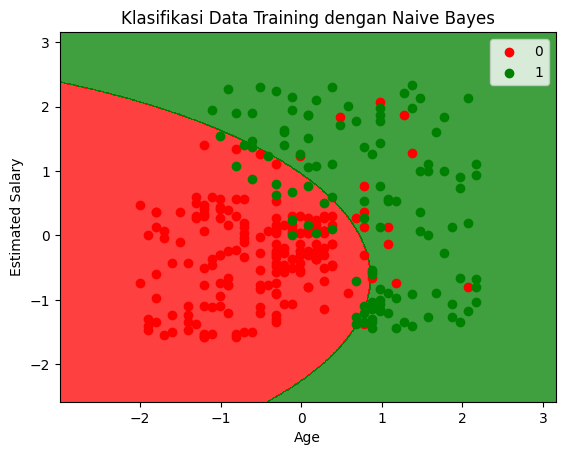

In [9]:
from matplotlib.colors import ListedColormap # Import library matplotlib.colors untuk memanggil function ListedColorMap
x_set, y_set = x_train, y_train 
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step = 0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max()+1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Klasifikasi Data Training dengan Naive Bayes')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visualising the Test Set Results**

<ipython-input-13-3bbd3b730e16>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)


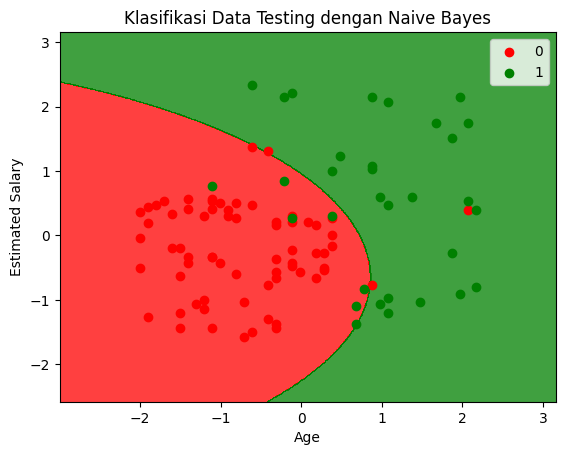

In [13]:
from matplotlib.colors import ListedColormap # Import library matplotlib.colors untuk memanggil function ListedColorMap
x_set, y_set = x_test, y_test 
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step = 0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max()+1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Klasifikasi Data Testing dengan Naive Bayes')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()